# **Project 2 - Part 1**
*   Samar KRIMI
*   25/08/2023

---

# FIRST DATASET

We will use the pre-approved dataset called **Metabolic Syndrome Prediction**. Stroke can be very hard to predict and therefore try to hinder, because it is the result of many different pathophysiologies.

1. Source of data :
Here is the link for where the data is found from kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data :
This is a healthcare dataset used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target :
There are 2 possible classes : predict stroke (target): 1 if the patient had a stroke or 0 if not.

4. What does one row represent :
Each row represents a specific patient.

5. Is this a classification or regression problem :
This is a binary classification problem.

6. How many features does the data have :
The data contains 12 attributes (columns).

7. How many rows are in the dataset :
The data contains 5110 observations (rows).

8. What challenges do you foresee in cleaning, exploring, or modeling this dataset :
- In cleaning :
Clean inaccurate or incorrect values, missing or incomplete data, outlier or anomalous data, and duplicate or redundant data.
I have to deal with inconsistent or conflicting features that creates confusion, incorrect features that could lead to bad decision-making and also affect the patient's life.
- In Exploring :
Identify relationships between different data variables and the distribution of data values in order to reveal patterns and points of interest, enabling to gain greater insight into the raw data.
- In Modeling :
Choose the right data model especially when data is unbalanced, regularize the model by tunning hyperparameters and dealing with class imbalance and compare the model's performance.

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [406]:
# Load & read data from folder structure
fpath = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(fpath)
# Explore data : missing values, columns, types
df.info()
# Top rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [407]:
# Check target balance
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [408]:
# Check target balance in percent : a highly unbalanced dataset
df['stroke'].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

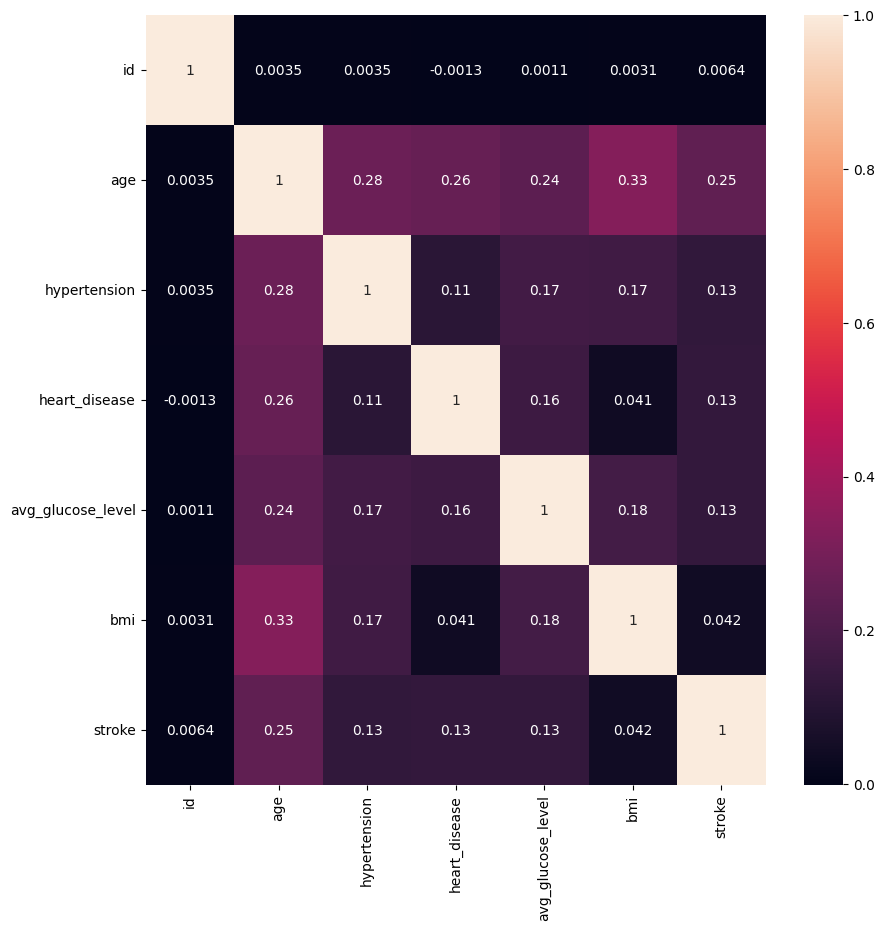

In [409]:
# Check the correlation between all features and target : low correlation & very low correlation
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax);

# EDA : Cleaning Data

## Deleted unnecessary columns

In [410]:
# Drop unnecessery columns ('id' is not predictive)
df1=df.drop(columns=['id'])

In [411]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Deleted duplicate rows

In [412]:
# Check for exact duplicates (rows) : No duplicated
df1.duplicated().sum()

0

## Identified and addressed missing values

In [413]:
# Check missing values :
df1.isna().sum().sum()

201

In [414]:
# Check missing values in each feature
df1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [415]:
# Exploratory Visualization to determine the best imputation method for the numerical column 'bmi'
def plot_numeric(df1,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df1,x = col,ax = axes[0])
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df1, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

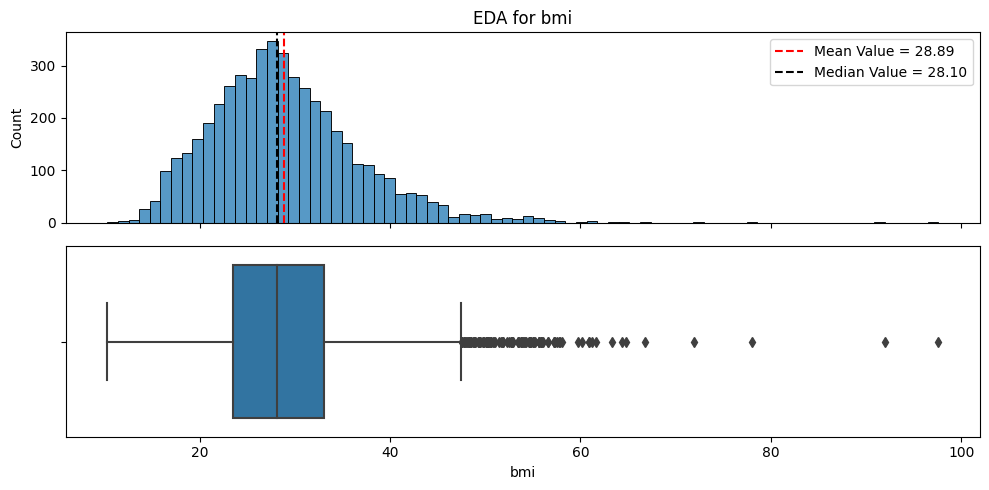

In [416]:
plot_numeric(df1,'bmi')

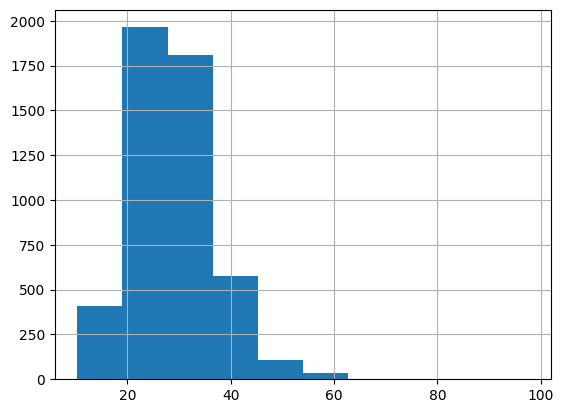

In [417]:
# Plot histogram for body mass index feature
df1['bmi'].hist();

* Missing values in 'bmi' feature = 3.93% < 5% we can drop them but I choose to impute the values by simple imputation technique: median imputation because the distribution is skewed and the median is less sensitive to outliers than the mean.

In [418]:
# Impute missig values in 'bmi'feature by median
df1['bmi'].fillna(df['bmi'].median(), inplace = True)

In [419]:
# No remaining missing values
df1.isna().sum().sum()

0

## Identified and corrected inconsistencies in data for categorical values

In [420]:
# Check for total values for each type
df1.dtypes.value_counts()

object     5
float64    3
int64      3
dtype: int64

In [421]:
# The 'hypertension', 'heart_disease', 'stroke' columns are nominal categorical variables 1 : Yes, 0 : No
# Convert the datatype from integer to object
df1['hypertension'] = df['hypertension'].astype(object)
df1['heart_disease'] = df['heart_disease'].astype(object)
df1['stroke'] = df['stroke'].astype(object)

In [422]:
# Check types after conversion
df1.dtypes.value_counts()

object     8
float64    3
dtype: int64

We have 5 Nominal Features: gender, ever_married, work_type, Residence_type  and smoking_status and 3 nominal categorical features: hypertension, heart_disease and stroke (target).

In [423]:
# Checking nuniuqe categories : No feature with high cardinality to drop
df1.select_dtypes('object').nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

In [424]:
# Check the categorical values of 'gender' feature => nominal feature
df1['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [425]:
# Inconsistent category from gender column is fixed : replace Other by Male (the lower category)
df1['gender'] = df1['gender'].replace(['Other'],['Male'])
df1['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [426]:
# Check the categorical values of 'ever_married' feature => nominal feature
df1['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [427]:
# Check the categorical values of 'work_type' feature => nominal feature
df1['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [428]:
# Inconsistent category from 'work_type' column is fixed : replace children (first lower letter) by Children (first Upper letter)
df1['work_type'] = df1['work_type'].replace(['children'],['Children'])
df1['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [429]:
# Filter the 22 patients whom never worked ranked by age
df1.loc[df1['work_type']=='Never_worked'].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4410,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
3196,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
3972,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
2740,Male,15.0,0,0,No,Never_worked,Rural,79.59,28.4,Unknown,0
2781,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0
4068,Female,16.0,0,0,No,Never_worked,Urban,102.10,27.1,never smoked,0


I leave the 22 few number Never_worked, I can't replace it with children because the children's age not exceed 16 years and Never_worked have some ages between 17 & 23 years.

In [430]:
# Check the categorical values of 'Residence_type' feature => nominal feature
df1['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [431]:
# Replace (first Upper letter) by (first lower letter) in column name to match with all columns name
df1 = df1.rename(columns={'Residence_type': 'residence_type'})

In [432]:
# Check the categorical values of 'smoking_status' feature => nominal feature
df1['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [433]:
# Inconsistent category from smoking_status column is fixed : replace Unknown by occasional smoker
df1['smoking_status'] = df['smoking_status'].replace(['Unknown'],['occasional smoker'])
df1['smoking_status'].value_counts()

never smoked         1892
occasional smoker    1544
formerly smoked       885
smokes                789
Name: smoking_status, dtype: int64

## Identified and corrected inconsistencies in data for numeric values

In [434]:
# Convert the datatype from float to integer
df1['age'] = df1['age'].astype(int)

In [435]:
# Check the cleaned dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 439.3+ KB


In [436]:
# Check types after conversion : dtypes are consistent and make sense
df1.dtypes.value_counts()

object     8
float64    2
int64      1
dtype: int64

In [437]:
# Checking nuniuqe categories
df1.select_dtypes('number').nunique()

age                    83
avg_glucose_level    3979
bmi                   418
dtype: int64

In [438]:
# Checking for inconsistent numeric variables
# Limit output to min, max, 25% and 75%
df1.describe().round(2).loc[['mean','min','25%','75%','max']]

,age,avg_glucose_level,bmi
mean,43.22,106.15,28.86
min,0.00,55.12,10.30
25%,25.00,77.24,23.80
75%,61.00,114.09,32.80
max,82.00,271.74,97.60


In [439]:
# Impossible value for min age (must be > 0 year): we should fix it by its mean value
df1[['age']].mean()

age    43.215264
dtype: float64

In [440]:
# Replace min=0 by its mean value in 'age' feature
df1['age']=df1['age'].replace(0, df1['age'].mean())

In [441]:
# Check statistics after fixing 'age' feature
df1.describe().round(2).loc[['mean','min','25%','75%','max']]

,age,avg_glucose_level,bmi
mean,43.58,106.15,28.86
min,1.00,55.12,10.30
25%,26.00,77.24,23.80
75%,61.00,114.09,32.80
max,82.00,271.74,97.60


In [442]:
# Check for unique values in columns
df1.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

## Produced exploratory visuals for the target and all features

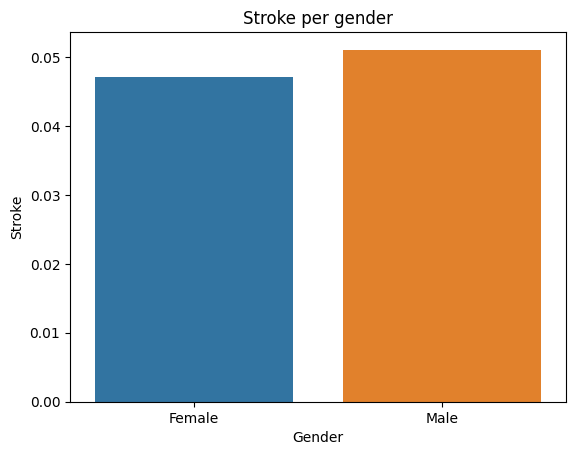

In [443]:
# Group stroke by gender
stroke_gender=df1.groupby('gender')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_gender.index, y=stroke_gender.values);
plt.xlabel('Gender');
plt.ylabel('Stroke');
plt.title('Stroke per gender');

* Stroke targets male patients more than females.

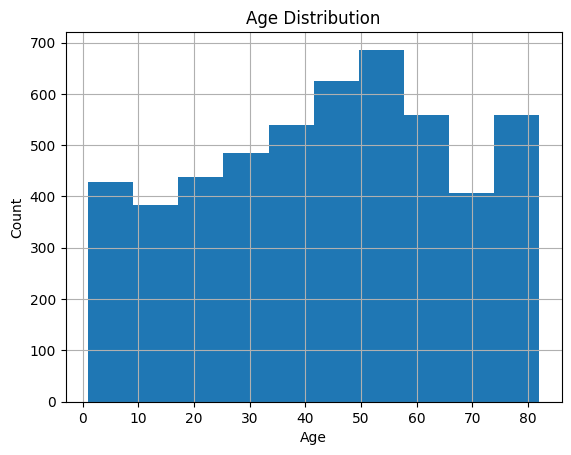

In [444]:
# Plot histogram for 'age' feature
df1['age'].hist()
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age Distribution');

* Most patients have an age between 50 and 58 years old.

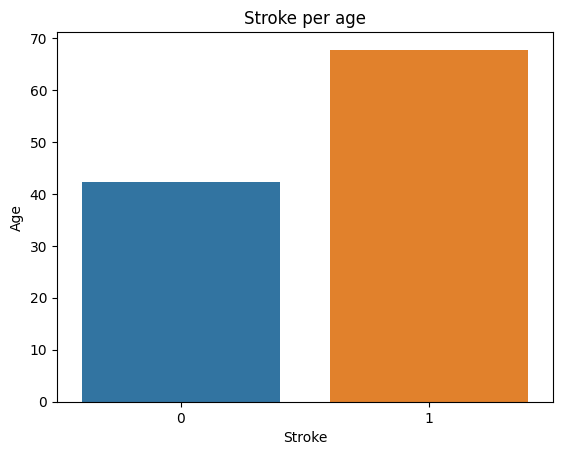

In [455]:
# Group age by stroke
stroke_age=df1.groupby('stroke')['age'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_age.index, y=stroke_age.values);
plt.xlabel('Stroke');
plt.ylabel('Age');
plt.title('Stroke per age');

* Patients who are more than 40 are most likely to develop a stroke.

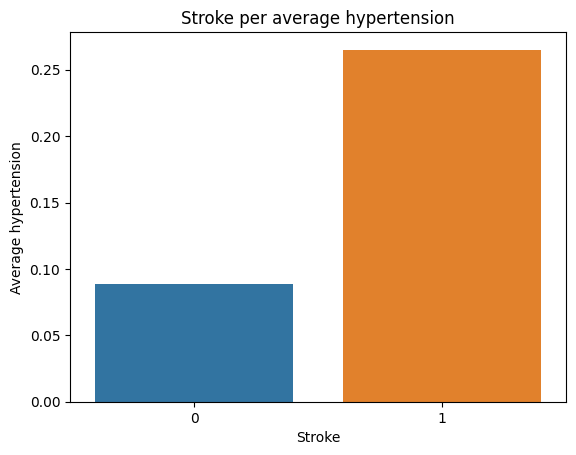

In [446]:
# Group hypertension by stroke
stroke_hyper=df1.groupby('stroke')['hypertension'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_hyper.index, y=stroke_hyper.values);
plt.xlabel('Stroke');
plt.ylabel('Average hypertension');
plt.title('Stroke per average hypertension');

* Patients who have an hypertension lower than 0.1 are not likely to develop a stroke. High blood pressure is the biggest risk factor for stroke. It can lead to blocked arteries, it can also make them weaker, causing them to break which can cause a stroke.

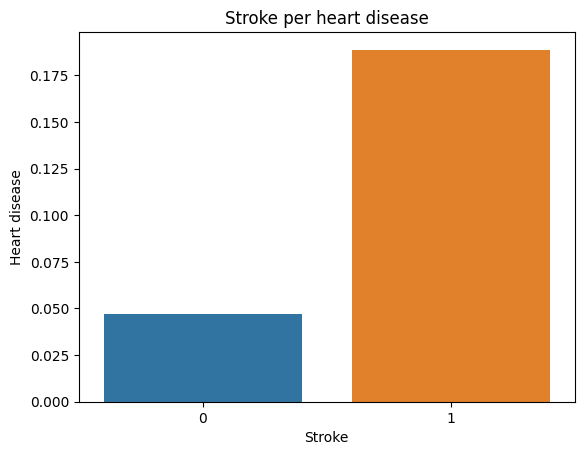

In [447]:
# Group heart_disease by stroke
stroke_heart=df1.groupby('stroke')['heart_disease'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_heart.index, y=stroke_heart.values);
plt.xlabel('Stroke');
plt.ylabel('Heart disease');
plt.title('Stroke per heart disease');

* A high rate of cardiovascular disease necessarily leads to a stroke.

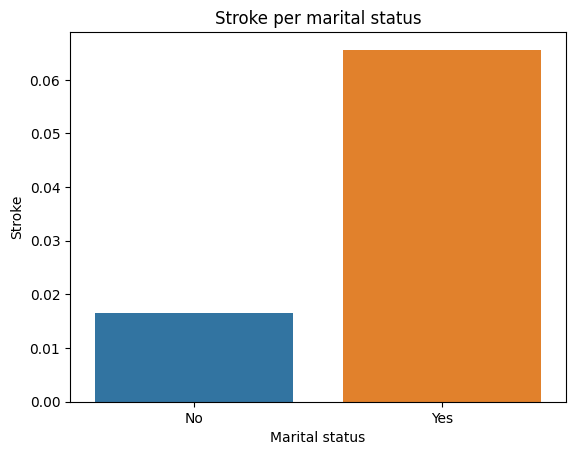

In [456]:
# Group stroke by ever_married
stroke_marr=df1.groupby('ever_married')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_marr.index, y=stroke_marr.values);
plt.xlabel('Marital status');
plt.ylabel('Stroke');
plt.title('Stroke per marital status');

* Patients who are married develop more stroke than single ones may be due to the conflicts between spouses.

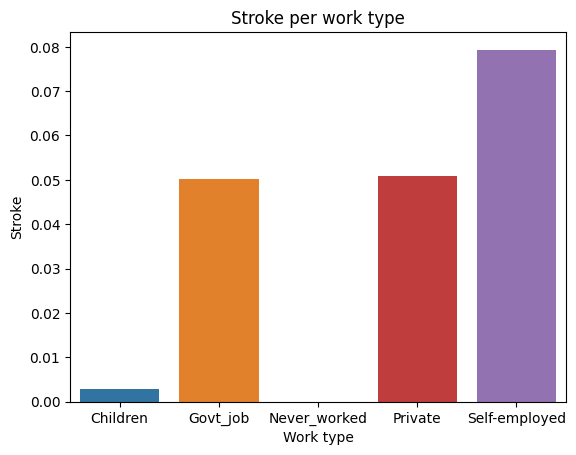

In [449]:
# Group stroke by work type
stroke_work=df1.groupby('work_type')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_work.index, y=stroke_work.values);
plt.xlabel('Work type');
plt.ylabel('Stroke');
plt.title('Stroke per work type');

* Patients who have private or government jobs are equally affected by a stroke, self employed are the most affected may be because their condition is more stressful than patients with a fixed salary, patients who have never worked are not affected by a stroke. So stress is the trigger for stroke.

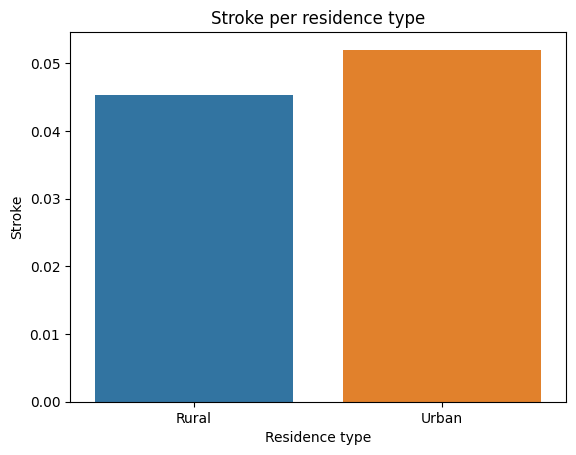

In [457]:
# Group stroke by residence_type
stroke_res=df1.groupby('residence_type')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_res.index, y=stroke_res.values);
plt.xlabel('Residence type');
plt.ylabel('Stroke');
plt.title('Stroke per residence type');

* Urban life induces stroke much more than rural life.

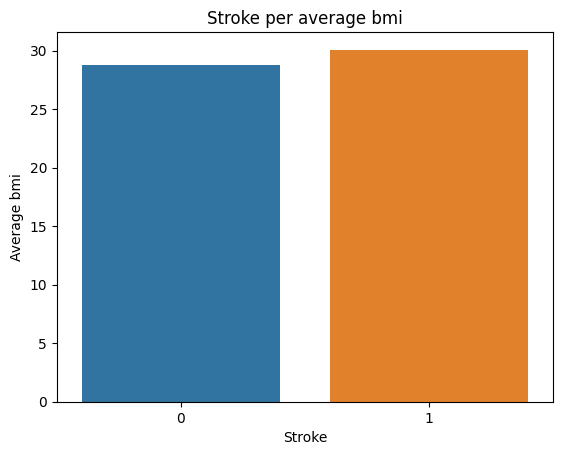

In [451]:
# Group bmi mean by stroke
stroke_bmi=df1.groupby('stroke')['bmi'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_bmi.index, y=stroke_bmi.values);
plt.xlabel('Stroke');
plt.ylabel('Average bmi');
plt.title('Stroke per average bmi');

* Diagnosis based on body mass index is not very relevant to determine if the patient will have a stroke.

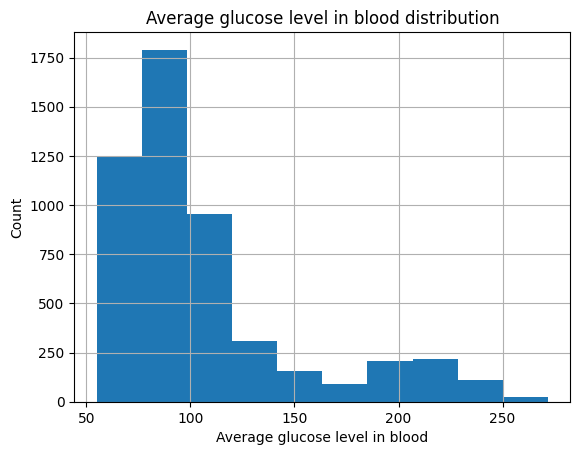

In [452]:
# Plot histogram for 'avg_glucose_level' feature
df1['avg_glucose_level'].hist()
plt.xlabel('Average glucose level in blood');
plt.ylabel('Count');
plt.title('Average glucose level in blood distribution');

* The most important Average glucose level in blood is between 60 and 100.

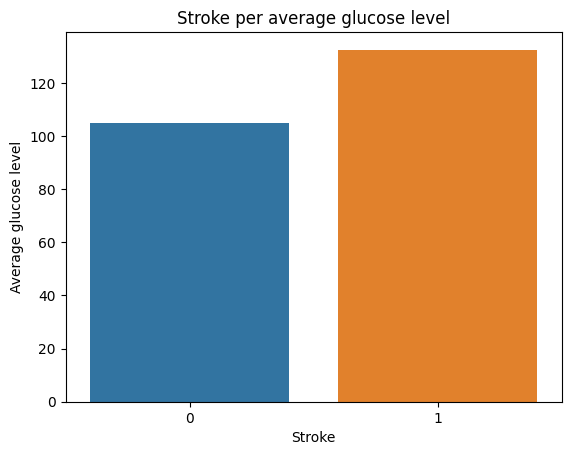

In [459]:
# Group avg_glucose_level mean by stroke
stroke_glu=df1.groupby('stroke')['avg_glucose_level'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_glu.index, y=stroke_glu.values);
plt.xlabel('Stroke');
plt.ylabel('Average glucose level');
plt.title('Stroke per average glucose level');

* For glucose levels above 100 patients are more likely to develop stroke.

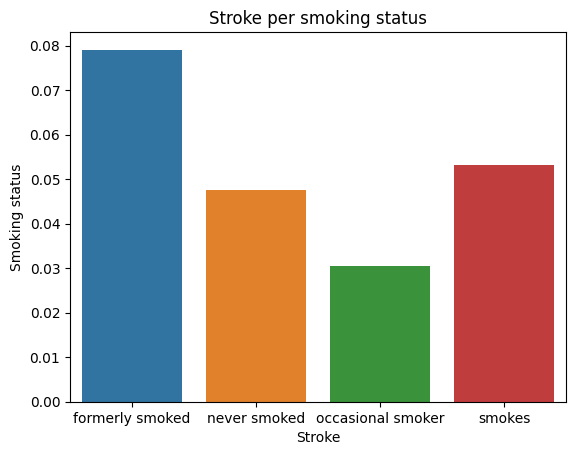

In [460]:
# Group stroke by smoking_status
stroke_smo=df1.groupby('smoking_status')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_smo.index, y=stroke_smo.values);
plt.xlabel('Stroke');
plt.ylabel('Smoking status');
plt.title('Stroke per smoking status');

* Patients who are formaly smoked or smokes are most susceptible to stroke. Patients that never smoked may have a stroke more than the occasional smokers maybe they have poor or unhealthy life quality.